In [30]:
%pylab nbagg
from comocmaes_many import Comocmaes
from problems import BiobjectiveConvexQuadraticProblem as problem
import cma
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [31]:
dim = 10
num_kernels = 3

# constructing a 3-objective function: 
myproblem0 = problem(dim, name = "sphere")
biobj = myproblem0.objective_functions()
myproblem1 = problem(dim, name = "sphere")
myproblem1.sep(1)
biobj_bis = myproblem1.objective_functions()

fun2 = biobj[0], biobj[1]
fun3 = biobj[0], biobj[1], biobj_bis[1]

#for 2 objectives:
fun = fun2
refpoint = [1.1, 1.1]

#for 3 objectives: 
fun = fun3 # outcomment if 2 objectives
refpoint = [1.1, 1.1, 1.1] # outcomment if 2 objectives

def fitness(x_var):
    return [ fonction(x_var) for fonction in fun]

x0 = np.zeros(dim)
sigma0 = 0.2

moes = Comocmaes(x0, sigma0, fitness, num_kernels, refpoint)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=488772, Sat Jul  6 14:25:54 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=586910, Sat Jul  6 14:25:54 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=572717, Sat Jul  6 14:25:54 2019)


In [32]:
moes.optimize(fitness)

In [33]:
moes.stop()

True

<IPython.core.display.Javascript object>


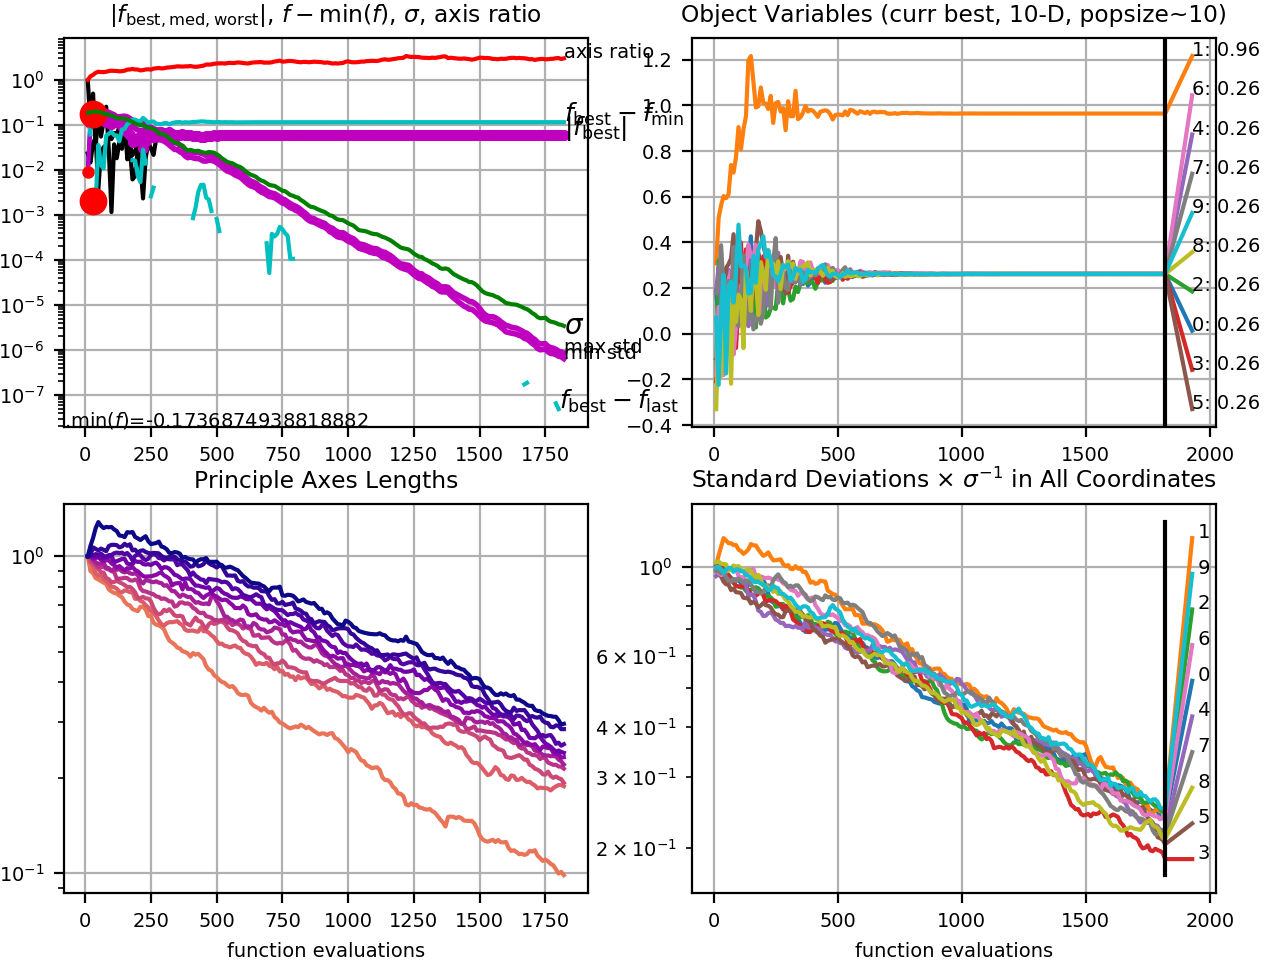

In [34]:
cma.plot("0")

<IPython.core.display.Javascript object>


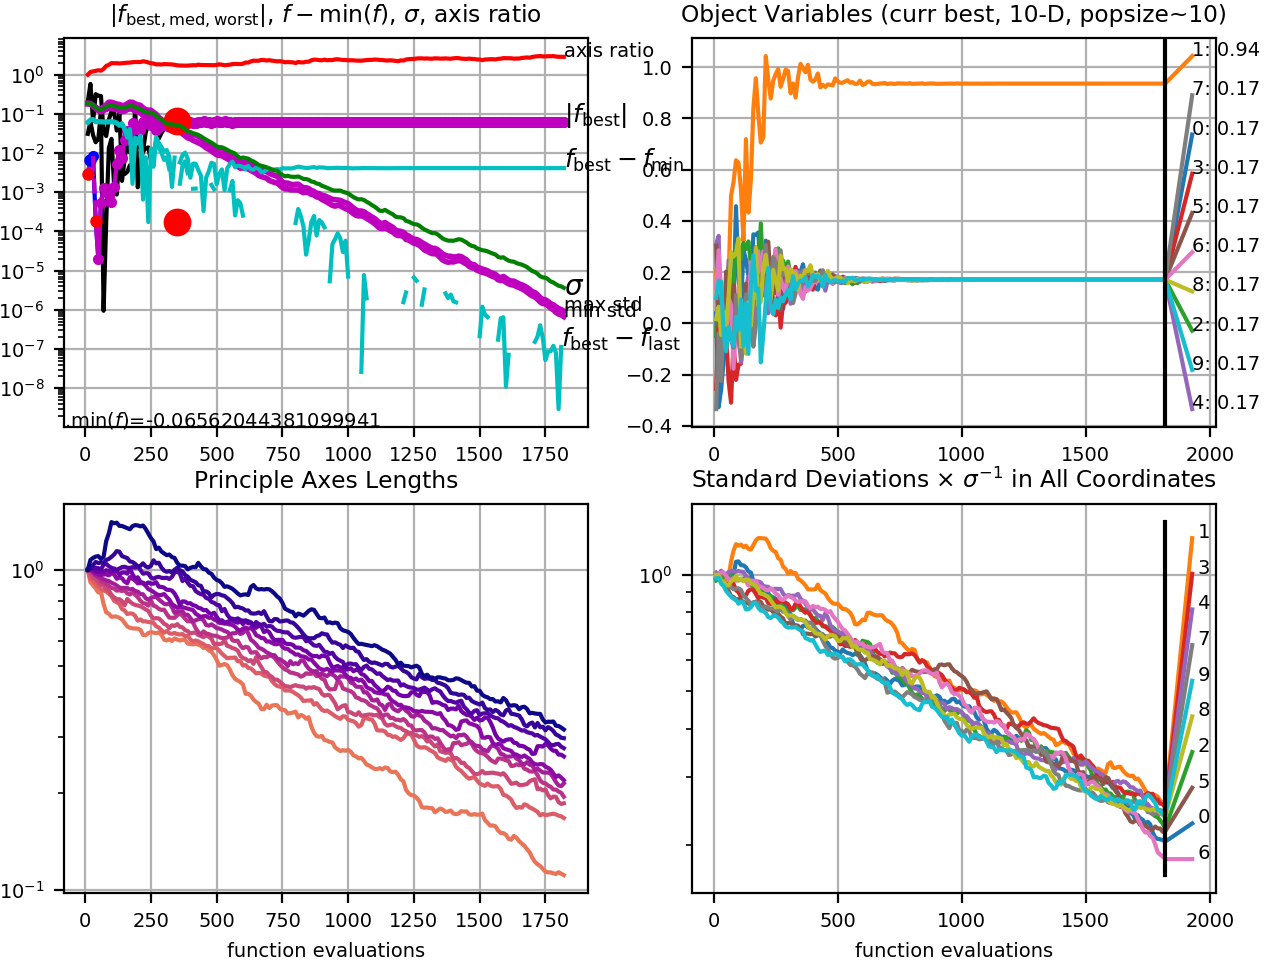

In [35]:
cma.plot("1")

<IPython.core.display.Javascript object>


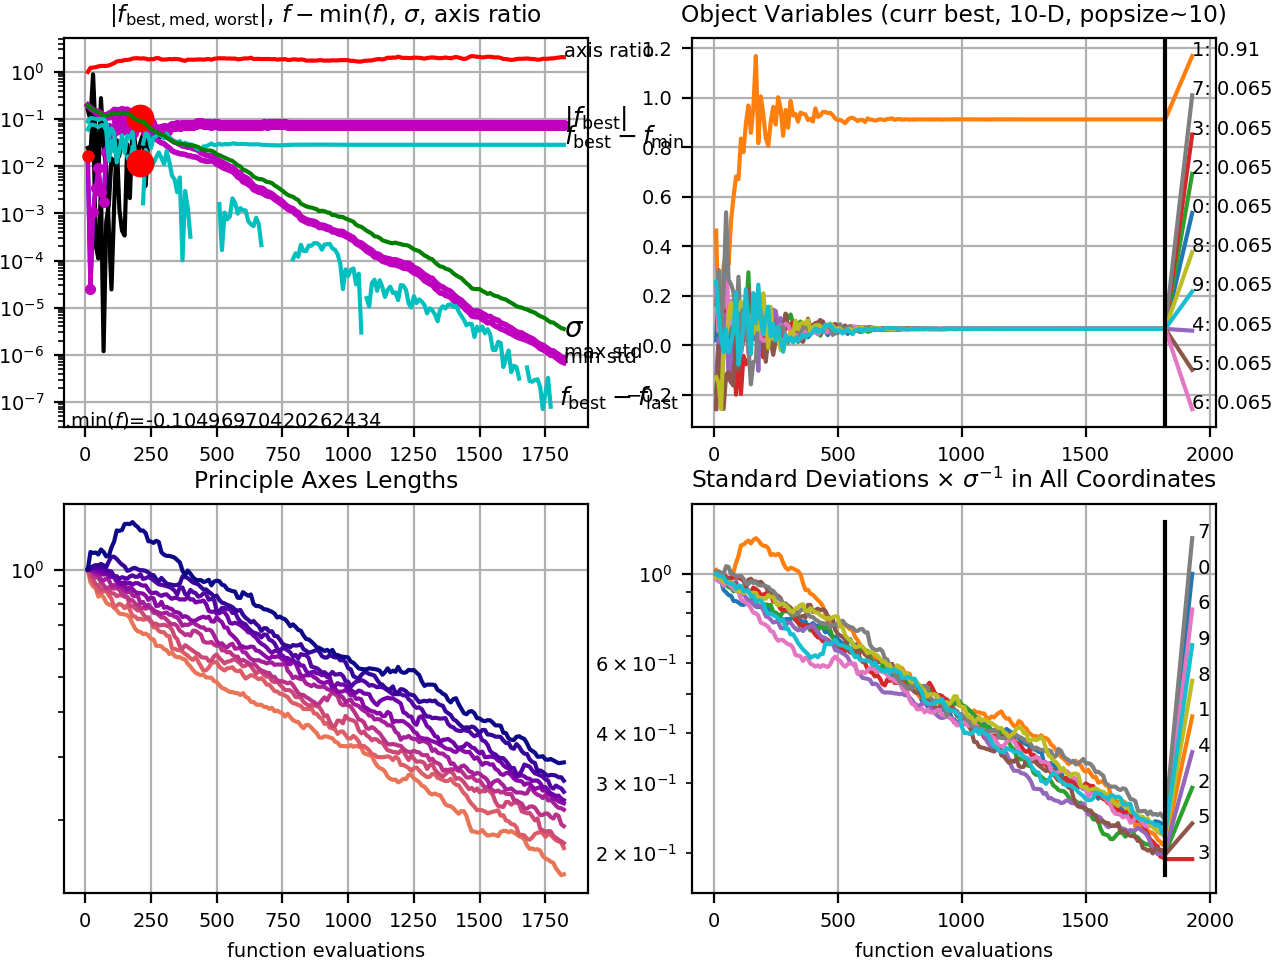

In [36]:
cma.plot("2")

In [37]:
moes = Comocmaes(x0, sigma0, fitness, num_kernels, refpoint)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=506458, Sat Jul  6 14:26:28 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=521401, Sat Jul  6 14:26:28 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=563884, Sat Jul  6 14:26:28 2019)


In [38]:
while not moes.stop():
    X = moes.ask()
    F = [moes.evaluate(x) for x in X]
    moes.tell(X,F)

In [39]:
moes.stop()

True

<IPython.core.display.Javascript object>


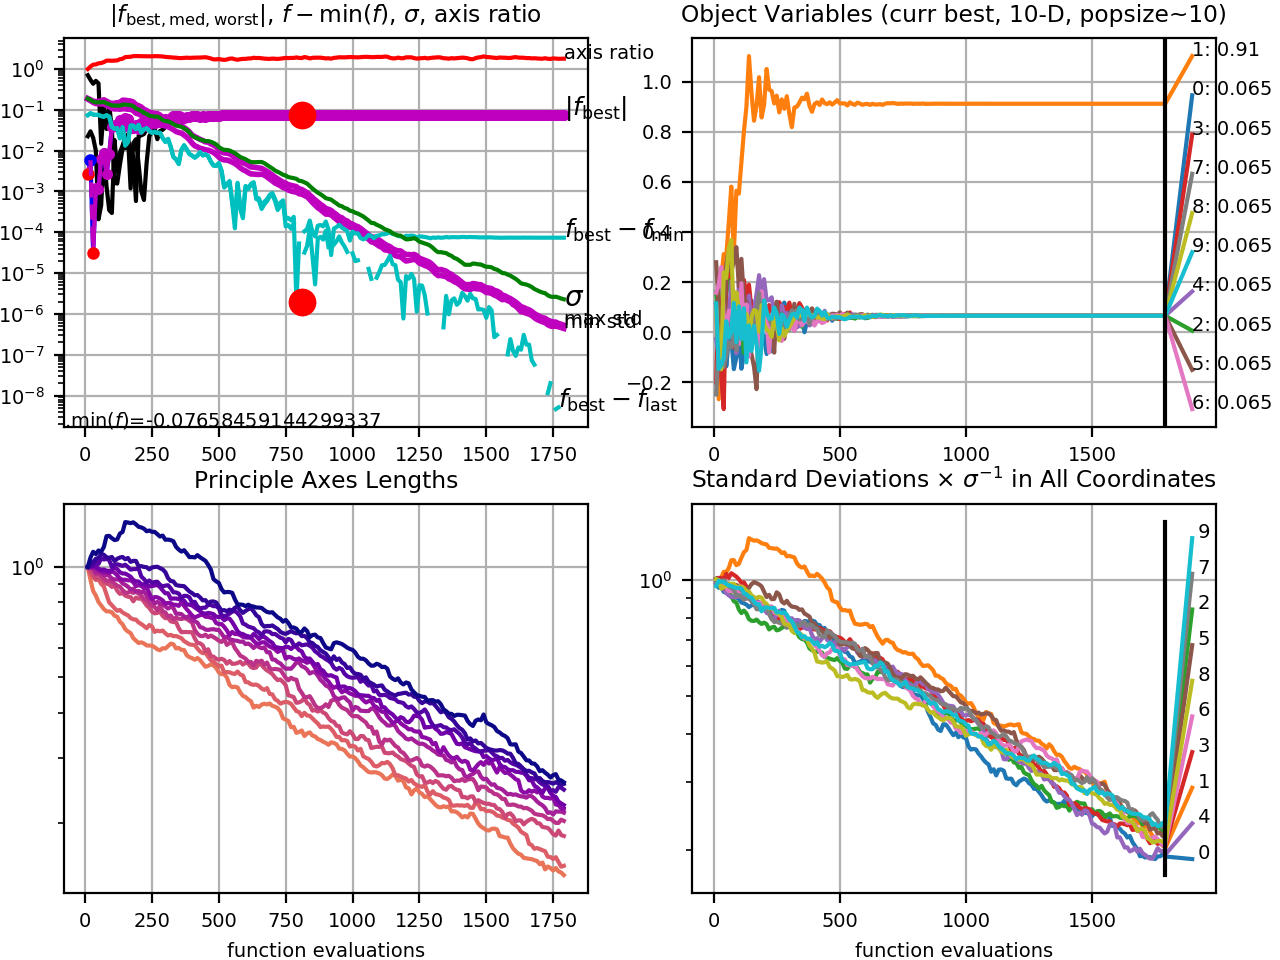

In [40]:
cma.plot("0")

<IPython.core.display.Javascript object>


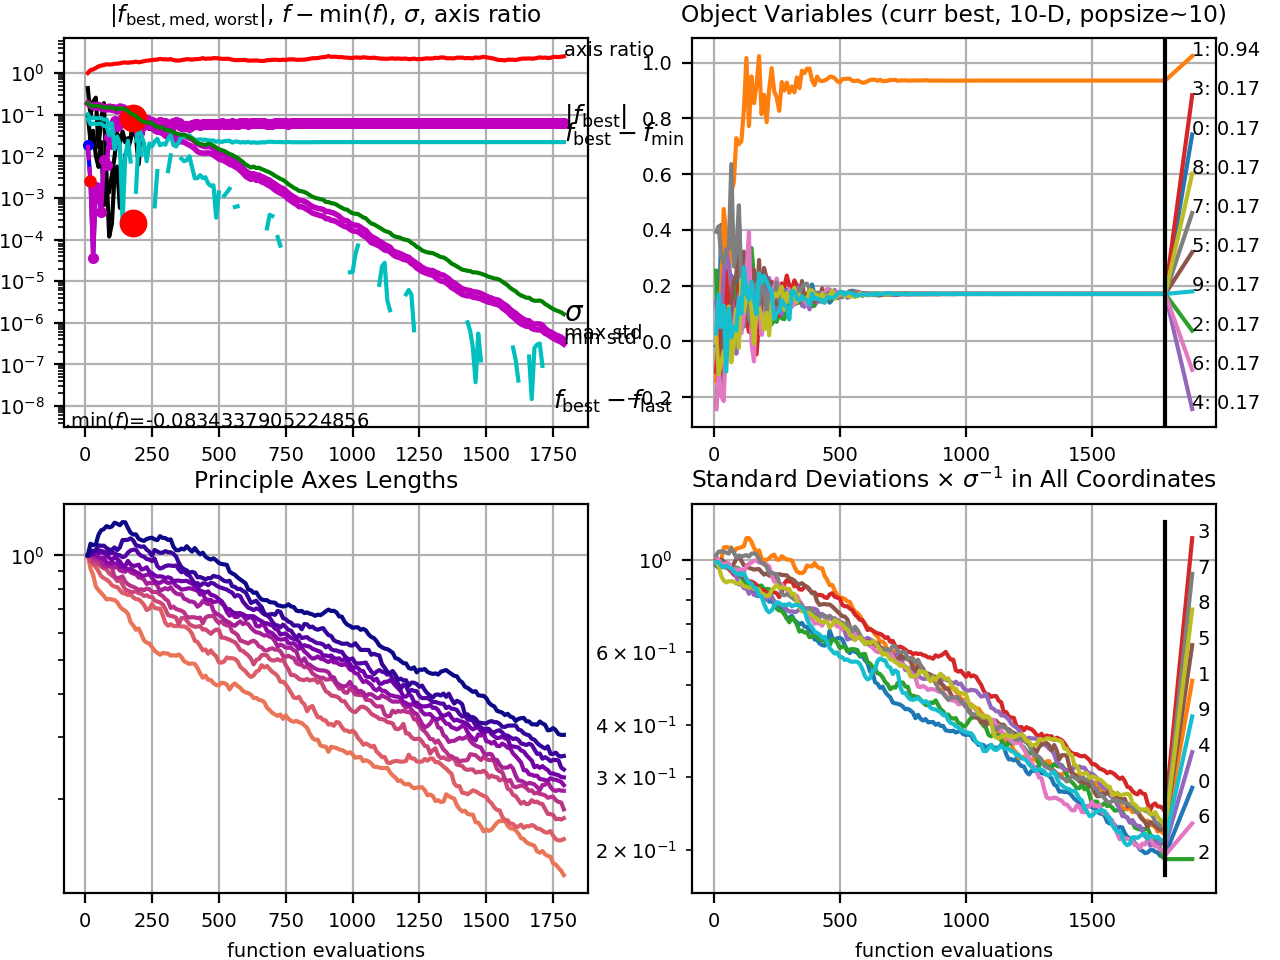

In [41]:
cma.plot("1")

<IPython.core.display.Javascript object>


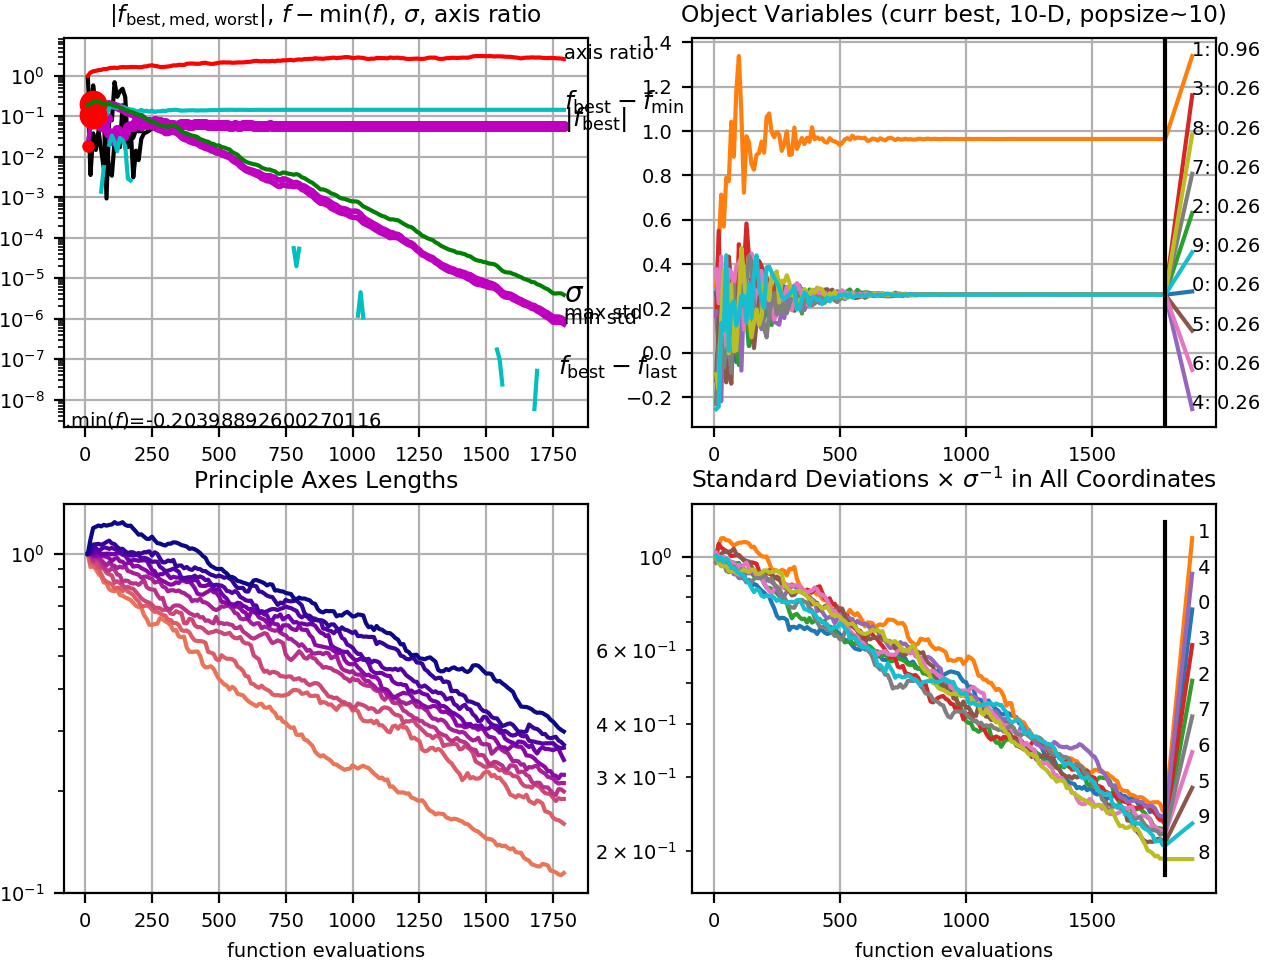

In [42]:
cma.plot("2")

In [43]:
# How to change some CMA options: by using the opts attribute (? I'm not sure that this is what we should do)
kernel = moes.kernels[0]
kernel.opts["popsize"] = 3

In [44]:
kernel.opts["popsize"]

3

In [ ]:
def front2obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """
    plt.figure()
    f1 = np.array([kernel.fit.fitness[0] for kernel in moes.kernels])
    f2 = np.array([kernel.fit.fitness[1] for kernel in moes.kernels])
    plt.grid(which = "major")
    plt.grid(which = "minor")

    plt.plot(f1,f2,'o')
    plt.xlabel('first objective function', fontsize=axislabelsize)
    plt.ylabel('second objective function', fontsize=axislabelsize)
    plt.title("Pareto front, {}D, {} kernels".format(moes.dim,
        moes.num_kernels), fontsize=titlelabelsize)         


In [ ]:
front2obj()

In [ ]:
def front3obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """     
